<a href="https://colab.research.google.com/github/SapphireSage/MLinCC/blob/main/2dqhoDVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
pi = np.pi
x_min = -10
x_max = 10
N = 80
delta_x = (x_max - x_min) / (N+1)
y_min = -10
y_max = 10
delta_y = (y_max - y_min) / (N+1)
m = 10000
cor_x = np.zeros(N)
for i in range(N):
    cor_x[i] = x_min + (i + 1) * delta_x

cor_y = np.zeros(N)
for i in range(N):
    cor_y[i] = y_min + (i + 1) * delta_y

U = np.zeros((N, N))
for m in range(N):
    for n in range(N):
        U[m, n] = np.sqrt(2 / (N + 1)) * np.sin((m + 1) * (n + 1) * pi / (N + 1))

In [4]:
def tx():
    mat = np.zeros((N, N))
    for i in range(N):
        mat[i,i] = (i+1)**2 * pi**2 / 2 / m / (x_max - x_min)**2
    return U @ mat @ U


def ty():
    mat = np.zeros((N, N))
    for i in range(N):
        mat[i,i] = (i+1)**2 * pi**2 / 2 / m / (y_max - y_min)**2
    return U @ mat @ U


def potential():
    mat = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            mat[i,j] = 0.5 * m * 0.0027338**2 * (cor_x[i]**2 + cor_y[j]**2)
    return mat

In [5]:
def showfig3d(array):
    X, Y = np.meshgrid(cor_y,cor_x)
    fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
    ax.plot_surface(X,Y,array,cmap=cm.twilight_shifted)
    plt.show()

In [6]:
Tx = tx()
Ty = ty()
Ham = np.kron(Tx,np.identity(N)) + np.kron(np.identity(N),Ty) + np.diag(potential().flatten())

In [7]:
e, v = np.linalg.eigh(Ham)

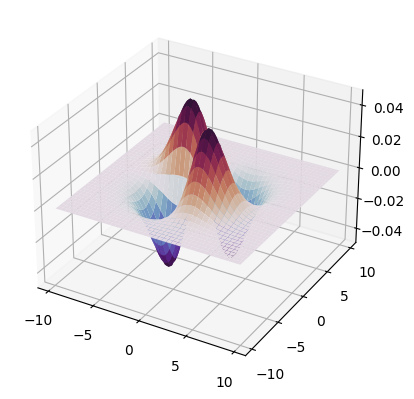

In [8]:
showfig3d(v[:,3].reshape(80,80))

In [9]:
import torch
device = torch.device('cuda')

In [10]:
Ht = torch.asarray(Ham).type(torch.float64).to(device)

In [11]:
et, vt = torch.linalg.eigh(Ht)